In [173]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
from astropy.coordinates import (CylindricalRepresentation,CartesianRepresentation,
                                 CartesianDifferential, Galactic)

In [278]:
def position_selection(R,z):
        # costants\
        M = 606*2.32*10**7 #Msum
        b = 0.39 #kpc
        r = np.sqrt(R**2+z**2)
        numb = 3*b**2*M 
        denb = 4*np.pi*(R**2+z**2)**(5/2)
        rhob = numb/denb
        
        Md,at,aT,bt,bT = 3960*2.32*10**7,5.31,2.0,0.25,0.8 # Msum, kpc
        num_thin= bt/4/np.pi*(at*R**2+(at+3*(z**2+bt**2)**(1/2)*(at+(z**2+bt**2)**(1/2))))*Md
        den_thin= (R**2+(at+(z**2+bt**2)**(1/2))**2)**(5/2)*(z**2+bt**2)**(3/2)
        num_thick= bT/4/np.pi*(aT*R**2+(aT+3*(z**2+bT**2)**(1/2)*(aT+(z**2+bT**2)**(1/2))))*Md
        den_thick= (R**2+(aT+(z**2+bT**2)**(1/2))**2)**(5/2)*(z**2+bT**2)**(3/2)
        rhothin = num_thin/den_thin
        rhothick = num_thick/den_thick
        rhod=  rhothin+rhothick

        Mh=4615*2.32*10**7
        ah=12
        C_rhoh = 1/4/np.pi/ah/r**2*Mh
        rhoh = C_rhoh*(r/ah)**(1.02)*((2.02+(r/ah)**(1.02))/(1+(r/ah)**(1.02))**2)
        
        p_prob = np.array([rhoh, rhob, rhod]) / np.nansum(np.array([rhoh, rhob, rhod]), axis=0)
        print(p_prob)
        component = np.array(['H', 'B', 'D'])

        idx = np.array(p_prob == np.nanmax(p_prob, axis=0))
        res = np.array([component[idx[:, i]][0] for i in range(np.shape(idx)[1])])
        return res

In [279]:
x = np.arange(-20,20,0.1)
R = np.arange(-20,20,0.1)
z = np.arange(-20,20,0.1)
m = []
for r in R:
        m.append(position_selection(r,z))

[[9.99854387e-01 9.99852171e-01 9.99849909e-01 ... 9.99847601e-01
  9.99849909e-01 9.99852171e-01]
 [3.46267141e-05 3.48990208e-05 3.51734987e-05 ... 3.54501582e-05
  3.51734987e-05 3.48990208e-05]
 [1.10985949e-04 1.12930051e-04 1.14917365e-04 ... 1.16949060e-04
  1.14917365e-04 1.12930051e-04]]
[[9.99853906e-01 9.99851681e-01 9.99849411e-01 ... 9.99847095e-01
  9.99849411e-01 9.99851681e-01]
 [3.48990813e-05 3.51749532e-05 3.54530433e-05 ... 3.57333626e-05
  3.54530433e-05 3.51749532e-05]
 [1.11194955e-04 1.13143612e-04 1.15135599e-04 ... 1.17172088e-04
  1.15135599e-04 1.13143612e-04]]
[[9.99853422e-01 9.99851189e-01 9.99848911e-01 ... 9.99846586e-01
  9.99848911e-01 9.99851189e-01]
 [3.51736222e-05 3.54531064e-05 3.57348566e-05 ... 3.60188847e-05
  3.57348566e-05 3.54531064e-05]
 [1.11404245e-04 1.13357469e-04 1.15354140e-04 ... 1.17395435e-04
  1.15354140e-04 1.13357469e-04]]
[[9.99852936e-01 9.99850695e-01 9.99848408e-01 ... 9.99846074e-01
  9.99848408e-01 9.99850695e-01]
 [3.545

[[9.99818648e-01 9.99815777e-01 9.99812846e-01 ... 9.99809854e-01
  9.99812846e-01 9.99815777e-01]
 [5.66788648e-05 5.72956475e-05 5.79204199e-05 ... 5.85532919e-05
  5.79204199e-05 5.72956475e-05]
 [1.24672908e-04 1.26927604e-04 1.29233783e-04 ... 1.31592871e-04
  1.29233783e-04 1.26927604e-04]]
[[9.99818018e-01 9.99815133e-01 9.99812190e-01 ... 9.99809184e-01
  9.99812190e-01 9.99815133e-01]
 [5.70966542e-05 5.77209931e-05 5.83534740e-05 ... 5.89942100e-05
  5.83534740e-05 5.77209931e-05]
 [1.24885843e-04 1.27145591e-04 1.29456962e-04 ... 1.31821386e-04
  1.29456962e-04 1.27145591e-04]]
[[9.99817385e-01 9.99814488e-01 9.99811531e-01 ... 9.99808513e-01
  9.99811531e-01 9.99814488e-01]
 [5.75164158e-05 5.81483833e-05 5.87886474e-05 ... 5.94373243e-05
  5.87886474e-05 5.81483833e-05]
 [1.25098503e-04 1.27363303e-04 1.29679867e-04 ... 1.32049628e-04
  1.29679867e-04 1.27363303e-04]]
[[9.99816751e-01 9.99813841e-01 9.99810872e-01 ... 9.99807840e-01
  9.99810872e-01 9.99813841e-01]
 [5.793

[[9.99781193e-01 9.99777502e-01 9.99773731e-01 ... 9.99769877e-01
  9.99773731e-01 9.99777502e-01]
 [8.27663290e-05 8.39214243e-05 8.50973438e-05 ... 8.62945397e-05
  8.50973438e-05 8.39214243e-05]
 [1.36040439e-04 1.38576143e-04 1.41171434e-04 ... 1.43828008e-04
  1.41171434e-04 1.38576143e-04]]
[[9.99780580e-01 9.99776875e-01 9.99773089e-01 ... 9.99769219e-01
  9.99773089e-01 9.99776875e-01]
 [8.32119865e-05 8.43774009e-05 8.55639203e-05 ... 8.67720056e-05
  8.55639203e-05 8.43774009e-05]
 [1.36207689e-04 1.38747713e-04 1.41347454e-04 ... 1.44008613e-04
  1.41347454e-04 1.38747713e-04]]
[[9.99779971e-01 9.99776251e-01 9.99772449e-01 ... 9.99768565e-01
  9.99772449e-01 9.99776251e-01]
 [8.36557870e-05 8.48315134e-05 8.60286267e-05 ... 8.72475964e-05
  8.60286267e-05 8.48315134e-05]
 [1.36373529e-04 1.38917841e-04 1.41522002e-04 ... 1.44187713e-04
  1.41522002e-04 1.38917841e-04]]
[[9.99779364e-01 9.99775630e-01 9.99771814e-01 ... 9.99767914e-01
  9.99771814e-01 9.99775630e-01]
 [8.409

[[9.99754734e-01 9.99750374e-01 9.99745913e-01 ... 9.99741349e-01
  9.99745913e-01 9.99750374e-01]
 [1.02444267e-04 1.04088596e-04 1.05768259e-04 ... 1.07484206e-04
  1.05768259e-04 1.04088596e-04]
 [1.42822143e-04 1.45537786e-04 1.48318601e-04 ... 1.51166479e-04
  1.48318601e-04 1.45537786e-04]]
[[9.99754546e-01 9.99750181e-01 9.99745715e-01 ... 9.99741146e-01
  9.99745715e-01 9.99750181e-01]
 [1.02586809e-04 1.04234927e-04 1.05918500e-04 ... 1.07638482e-04
  1.05918500e-04 1.04234927e-04]
 [1.42867301e-04 1.45584177e-04 1.48366263e-04 ... 1.51215453e-04
  1.48366263e-04 1.45584177e-04]]
[[9.99754369e-01 9.99749999e-01 9.99745528e-01 ... 9.99740954e-01
  9.99745528e-01 9.99749999e-01]
 [1.02721506e-04 1.04373207e-04 1.06060478e-04 ... 1.07784277e-04
  1.06060478e-04 1.04373207e-04]
 [1.42909928e-04 1.45627967e-04 1.48411254e-04 ... 1.51261683e-04
  1.48411254e-04 1.45627967e-04]]
[[9.99754202e-01 9.99749827e-01 9.99745352e-01 ... 9.99740773e-01
  9.99745352e-01 9.99749827e-01]
 [1.028

[[9.99760168e-01 9.99755952e-01 9.99751640e-01 ... 9.99747229e-01
  9.99751640e-01 9.99755952e-01]
 [9.83339959e-05 9.98705653e-05 1.01439074e-04 ... 1.03040348e-04
  1.01439074e-04 9.98705653e-05]
 [1.41497796e-04 1.44177514e-04 1.46921261e-04 ... 1.49730888e-04
  1.46921261e-04 1.44177514e-04]]
[[9.99760546e-01 9.99756340e-01 9.99752038e-01 ... 9.99747637e-01
  9.99752038e-01 9.99756340e-01]
 [9.80494730e-05 9.95786898e-05 1.01139618e-04 ... 1.02733075e-04
  1.01139618e-04 9.95786898e-05]
 [1.41404492e-04 1.44081693e-04 1.46822844e-04 ... 1.49629793e-04
  1.46822844e-04 1.44081693e-04]]
[[9.99760932e-01 9.99756736e-01 9.99752444e-01 ... 9.99748055e-01
  9.99752444e-01 9.99756736e-01]
 [9.77587708e-05 9.92804896e-05 1.00833688e-04 ... 1.02419176e-04
  1.00833688e-04 9.92804896e-05]
 [1.41308937e-04 1.43983562e-04 1.46722057e-04 ... 1.49526266e-04
  1.46722057e-04 1.43983562e-04]]
[[9.99761327e-01 9.99757141e-01 9.99752860e-01 ... 9.99748481e-01
  9.99752860e-01 9.99757141e-01]
 [9.746

[[9.99792645e-01 9.99789220e-01 9.99785722e-01 ... 9.99782149e-01
  9.99785722e-01 9.99789220e-01]
 [7.45401758e-05 7.55113782e-05 7.64986033e-05 ... 7.75021616e-05
  7.64986033e-05 7.55113782e-05]
 [1.32814937e-04 1.35268432e-04 1.37779071e-04 ... 1.40348465e-04
  1.37779071e-04 1.35268432e-04]]
[[9.99793297e-01 9.99789887e-01 9.99786404e-01 ... 9.99782847e-01
  9.99786404e-01 9.99789887e-01]
 [7.40776940e-05 7.50389336e-05 7.60159473e-05 ... 7.70090384e-05
  7.60159473e-05 7.50389336e-05]
 [1.32625227e-04 1.35073951e-04 1.37579679e-04 ... 1.40144017e-04
  1.37579679e-04 1.35073951e-04]]
[[9.99793950e-01 9.99790555e-01 9.99787087e-01 ... 9.99783545e-01
  9.99787087e-01 9.99790555e-01]
 [7.36152079e-05 7.45665252e-05 7.55333702e-05 ... 7.65160392e-05
  7.55333702e-05 7.45665252e-05]
 [1.32434557e-04 1.34878492e-04 1.37379292e-04 ... 1.39938558e-04
  1.37379292e-04 1.34878492e-04]]
[[9.99794604e-01 9.99791224e-01 9.99787771e-01 ... 9.99784245e-01
  9.99787771e-01 9.99791224e-01]
 [7.315

[[9.99825463e-01 9.99822726e-01 9.99819932e-01 ... 9.99817080e-01
  9.99819932e-01 9.99822726e-01]
 [5.22202107e-05 5.27586394e-05 5.33035353e-05 ... 5.38549770e-05
  5.33035353e-05 5.27586394e-05]
 [1.22316324e-04 1.24515603e-04 1.26764843e-04 ... 1.29065422e-04
  1.26764843e-04 1.24515603e-04]]
[[9.99826071e-01 9.99823345e-01 9.99820563e-01 ... 9.99817723e-01
  9.99820563e-01 9.99823345e-01]
 [5.18278650e-05 5.23596013e-05 5.28976796e-05 ... 5.34421762e-05
  5.28976796e-05 5.23596013e-05]
 [1.22101127e-04 1.24295389e-04 1.26539476e-04 ... 1.28834760e-04
  1.26539476e-04 1.24295389e-04]]
[[9.99826676e-01 9.99823962e-01 9.99821192e-01 ... 9.99818364e-01
  9.99821192e-01 9.99823962e-01]
 [5.14377571e-05 5.19628721e-05 5.24942059e-05 ... 5.30318326e-05
  5.24942059e-05 5.19628721e-05]
 [1.21885823e-04 1.24075073e-04 1.26314011e-04 ... 1.28604006e-04
  1.26314011e-04 1.24075073e-04]]
[[9.99827280e-01 9.99824577e-01 9.99821818e-01 ... 9.99819003e-01
  9.99821818e-01 9.99824577e-01]
 [5.104

In [280]:
mm = np.dstack(m)

In [281]:
mm = mm[0]
xv,yv = np.meshgrid(R,z)

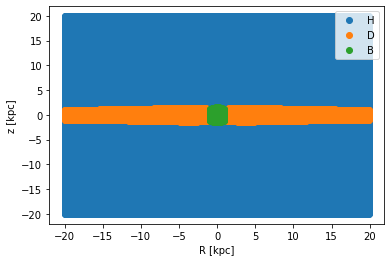

In [283]:
plt.plot(xv[np.where(mm=='H')],yv[np.where(mm=='H')],'o',label='H')
plt.plot(xv[np.where(mm=='D')],yv[np.where(mm=='D')],'o',label='D')
plt.plot(xv[np.where(mm=='B')],yv[np.where(mm=='B')],'o',label='B')
plt.xlabel('R [kpc]')
plt.ylabel('z [kpc]')
plt.legend()

In [174]:
def Bulge(x,y,z):
    x0,y0,z0 = 0.68,0.28,0.26 #kpc
    rho0 = 0.01#*606*2.32*10**7 #pc^-3
    r = np.sqrt((x/x0)**2+(y/y0)**2+(z/z0)**2)
    return rho0*np.exp(-r)

In [175]:
def Disk(z,R):
    M,at,aT,bt,bT = 3960*2.32*10**7,5.31,2.0,0.25,0.8 # Msum, kpc
    num_thin= bt/4/np.pi*(at*R**2+(at+3*(z**2+bt**2)**(1/2)*(at+(z**2+bt**2)**(1/2))))#*M
    den_thin= (R**2+(at+(z**2+bt**2)**(1/2))**2)**(5/2)*(z**2+bt**2)**(3/2)
    num_thick= bT/4/np.pi*(aT*R**2+(aT+3*(z**2+bT**2)**(1/2)*(aT+(z**2+bT**2)**(1/2))))#*M
    den_thick= (R**2+(aT+(z**2+bT**2)**(1/2))**2)**(5/2)*(z**2+bT**2)**(3/2)
    rhothin = num_thin/den_thin
    rhothick = num_thick/den_thick
    return rhothin+rhothick

In [176]:
def Halo(z,R):
    M=4615*2.32*10**7
    ah=12
    r = np.sqrt(z**2+R**2)
    C_rhoh = 1/4/np.pi/ah/r**2#*M
    rhoh = C_rhoh*(r/ah)**(1.02)*((2.02+(r/ah)**(1.02))/(1+(r/ah)**(1.02))**2)
    return rhoh

In [ ]:
Mb, Mdt, MdT, Mh = 606., 3690., 1700., 4615. # unit of *2.32*10**7 Msun
adt,adT,ah = 5.32, 2.6,12. #kpc
bb,bdt, bdT = 0.39, 0.25,0.8 #kpc

In [195]:
x = np.linspace(-40, 40, 1000)
y = np.linspace(-40,40, 1000)
z = .05
x0,y0,z0 = 0.68,0.28,0.26 #kpc
r = np.linspace(-np.sqrt((x.max()/x0)**2+(y.max()/y0)**2),np.sqrt((x.max()/x0)**2+(y.max()/y0)**2),1000)

In [196]:
R = np.linspace(-40, 40, 1000)
z=.05

In [197]:
bmap = Bulge(x,y,z)
hmap = Halo(z,R)
dmap = Disk(z,R)

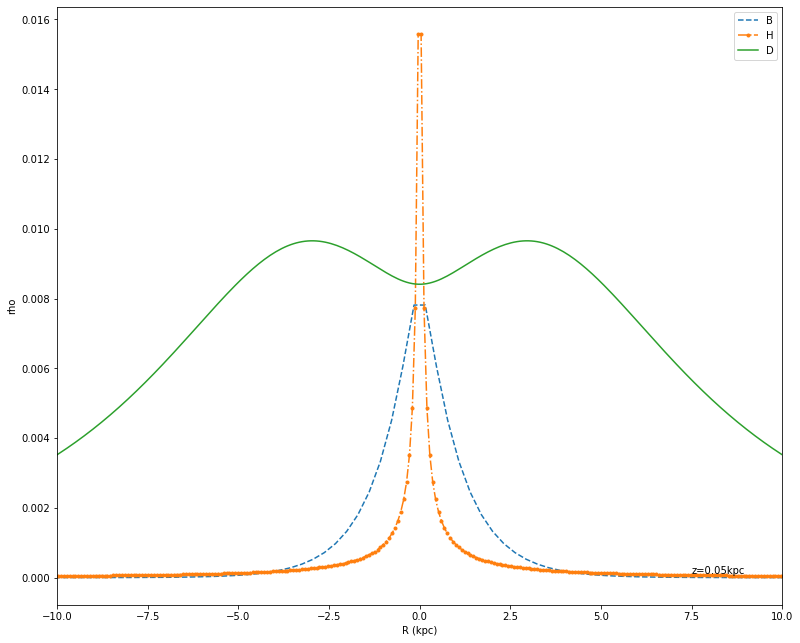

In [198]:
plt.figure(figsize=(13,11))
plt.plot(r,bmap,'--',label='B')
plt.plot(R,hmap,'.-.',label='H')
plt.plot(R,dmap,'-',label='D')
plt.xlabel('R (kpc)')
plt.xlim([-10,10])
plt.ylabel('rho')
plt.annotate('z={}kpc'.format(z),xy=(7.5,0.00012))
plt.legend()